# Parte 3 - Visualización con matplotlib

## ¿Qué es matplotlib?

* Estándar *de facto* para visualización en Python
* Pretende ser similar a las funciones de visualización de MATLAB
* Diferentes formas de usarla: interfaz `pyplot` y orientada a objetos

Lo primero que vamos a hacer es activar el modo *inline* - de esta manera las figuras aparecerán automáticamente incrustadas en el notebook.

In [1]:
%matplotlib inline

Importamos los paquetes necesarios:

In [2]:
import numpy as np
import matplotlib.pyplot as plt

La biblioteca matplotlib es gigantesca y es difícil hacerse una idea global de todas sus posibilidades en una primera toma de contacto. Es recomendable tener a mano la documentación y la galería:

In [1]:
from IPython.display import HTML
HTML('<iframe src="http://matplotlib.org/gallery.html#pylab_examples" width="800" height="600"></iframe>')

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\display.py:701: UserWarning: Consider using IPython.display.IFrame instead
  warnings.warn("Consider using IPython.display.IFrame instead")


Si hacemos clic en cualquiera de las imágenes, accedemos al código fuente que la ha generado:

In [4]:
HTML('<iframe src="http://matplotlib.org/examples/pylab_examples/annotation_demo.html" width="800" height="600"></iframe>')

## Interfaz pyplot

### Función `plot`

La interfaz `pyplot` proporciona una serie de funciones que operan sobre un *estado global* - es decir, nosotros no especificamos sobre qué gráfica o ejes estamos actuando. Es una forma rápida y cómoda de crear gráficas pero perdemos parte del control.

El paquete `pyplot` se suele importar bajo el alias `plt`, de modo que todas las funciones se acceden a través de `plt.<funcion>`. La función más básica es la función `plot`:

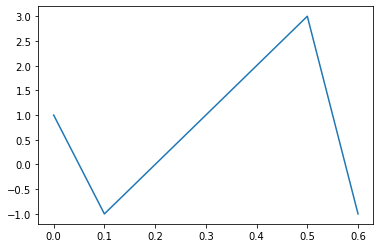

In [5]:
plt.plot([0, 0.1, 0.2, 0.5,0.6], [1, -1, 0, 3, -1])

La función `plot` recibe una sola lista (si queremos especificar los valores *y*) o dos listas (si especificamos *x* e *y*). Naturalmente si especificamos dos listas ambas tienen que tener la misma longitud.

La tarea más habitual a la hora de trabajar con matplotlib es representar una función. Lo que tendremos que hacer es definir un dominio y evaluarla en dicho dominio. Por ejemplo:

$$f(x) = e^{-x^2}$$

In [6]:
def f(x):
    return np.exp(-x ** 2)

Definimos el dominio con la función `np.linspace`, que crea un vector de puntos equiespaciados:

In [9]:
x = np.linspace(-1, 5, num=1000)

Y representamos la función:

Text(0.5, 1.0, 'Función $f(x)$')

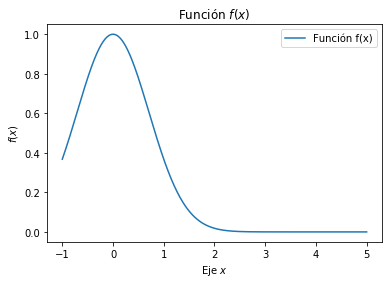

In [15]:
plt.plot(x, f(x), label="Función f(x)")
plt.xlabel("Eje $x$")
plt.ylabel("$f(x)$")
plt.legend()
plt.title("Función $f(x)$")

Notamos varias cosas:

* Con diversas llamadas a funciones dentro de `plt.` se actualiza el gráfico *actual*. Esa es la forma de trabajar con la interfaz pyplot.
* Podemos añadir etiquetas, y escribir $\LaTeX$ en ellas. Tan solo hay que encerrarlo entre signos de dólar $$.

### Personalización

La función `plot` acepta una serie de argumentos para personalizar el aspecto de la función. Con una letra podemos especificar el color, y con un símbolo el tipo de línea.

In [ ]:
plt.plot(x, f(x), 'ro')
plt.plot(x, 1 - f(x), 'g--')

Esto en realidad son códigos abreviados, que se corresponden con argumentos de la función `plot`:

In [ ]:
plt.plot(x, f(x), color='red', linestyle='', marker='o')
plt.plot(x, 1 - f(x), c='g', ls='--')

La lista de posibles argumentos y abreviaturas está disponible en la documentación de la función `plot` http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot.

### Otro tipo de gráficas

La función `scatter` muestra una nube de puntos, con posibilidad de variar también el tamaño y el color.

In [ ]:
N = 100
x = np.random.randn(N)
y = np.random.randn(N)

plt.scatter(x, y)
plt.grid()

Con `s` y `c` podemos modificar el tamaño y el color respectivamente. Para el color, a cada valor numérico se le asigna un color a través de un *mapa de colores*; ese mapa se puede cambiar con el argumento `cmap`. Esa correspondencia se puede visualizar llamando a la función `colorbar`.

In [ ]:
s = 50 + 50 * np.random.randn(N)
c = np.random.randn(N)

plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Blues)
plt.colorbar()
plt.grid()

In [ ]:
plt.scatter(x, y, s=s, c=c, cmap=plt.cm.Oranges)
plt.colorbar()

matplotlib trae por defecto muchos mapas de colores. En las SciPy Lecture Notes dan una lista de todos ellos:

![matplotlib colormaps](plot_colormaps.png)

La función `contour` se utiliza para visualizar las curvas de nivel de funciones de dos variables y está muy ligada a la función `np.meshgrid`. Veamos un ejemplo:

$$f(x) = \cos{x} + \sin^2{y}$$

In [ ]:
def f(x, y):
    return np.cos(x) + np.sin(y)**2

In [ ]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)
xx, yy = np.meshgrid(x, y)

plt.contour(xx, yy, f(xx, yy))
plt.colorbar()

La función `contourf` es casi idéntica pero rellena el espacio entre niveles. Podemos especificar manualmente estos niveles usando el cuarto argumento:

In [ ]:
zz = f(xx, yy)
plt.contourf(xx, yy, zz, np.linspace(-0.5, 2.0))
plt.colorbar()

Para guardar las gráficas en archivos aparte podemos usar la función `plt.savefig`. matplotlib usará el tipo de archivo adecuado según la extensión que especifiquemos. Veremos esto con más detalle cuando hablemos de la interfaz orientada a objetos.

## Interfaz orientada a objetos

In [ ]:
x

In [ ]:
f(x)

In [ ]:
fig, axes = plt.subplots()

axes.plot(x, f(x), 'ro', label="Función F(x)")
axes.set_xlim(-2, 4)
axes.set_ylim(-1, 2)

fig.savefig("grafica1.png")

In [ ]:
fig, axes = plt.subplots(1, 2, sharey=True)

axes[0].plot(x, f(x), color="blue")
axes[0].set_xlabel("Eje x")

axes[1].plot(x, -f(x), 'r')
axes[1].set_xlabel("Eje x de la gráfica derecha")

In [ ]:
x = np.random.randn(100)
y = np.random.randn(100)

s = 200 * np.random.randn(100)
c = np.random.randn(100)

plt.scatter(x, y, s, c, cmap=plt.cm.BrBG_r)

$$g(x, y) = \cos(x) + \sin(y)^2$$

In [ ]:
x = np.linspace(-2, 2)
y = np.linspace(-2, 2)

xx, yy = np.meshgrid(x, y)

In [ ]:
def g(x, y):
    return np.cos(x) + np.sin(y) ** 2

In [ ]:
zz = g(xx, yy)

In [ ]:
fig, axes = plt.subplots()

axes.contourf(xx, yy, zz, np.linspace(-1, 1), cmap=plt.cm.autumn)

* `fig, axes = plt.subplots`
* Diferencias de conceptos

## Ejemplo con datos reales

In [ ]:
!cat temperaturas.csv

In [ ]:
datos = np.loadtxt("temperaturas.csv", usecols=(1, 2, 3), skiprows=1, delimiter=',')

In [ ]:
fig, axes = plt.subplots()

x = np.arange(len(datos[:, 1]))

temp_media = (datos[:, 1] + datos[:, 2]) / 2

axes.plot(x, datos[:, 1], 'r')
axes.plot(x, datos[:, 2], 'b')
axes.plot(x, temp_media, 'k')

## Referencias

* Documentación pyplot http://matplotlib.org/api/pyplot_api.html
* Tutorial de matplotlib en español http://pybonacci.wordpress.com/tag/tutorial-matplotlib-pyplot/
* Referencia rápida de matplotlib http://scipy-lectures.github.io/intro/matplotlib/matplotlib.html#quick-references